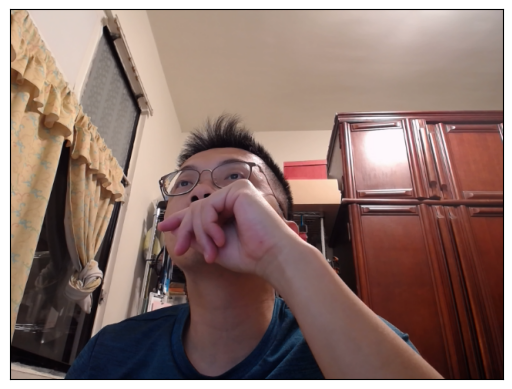

In [ ]:
%matplotlib inline
import keyboard
import time
import cv2
import matplotlib.pyplot as plt

def grab_frame(cap):
    ret, frame = cap.read()
    if not ret:
        print('no image captured!')
        exit()
    return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#Initiate the two cameras
cap1 = cv2.VideoCapture(0)

#create two subplots
fig, ax = plt.subplots(1,1)

#create two image plots
im = ax.imshow(grab_frame(cap1))

def update():
    im.set_data(grab_frame(cap1))

def close(event):
    if event.key == 'q':
        plt.close(event.canvas.figure)

plt.tick_params(
    top=False, bottom=False, left=False, right=False,
    labelleft=False, labelbottom=False
)

plt.show()
     
while True:
    try:
        update()
        fig.canvas.draw()
        #time.sleep(1)
    except KeyboardInterrupt:
        cap1.release()
        break

In [2]:
!wget https://raw.githubusercontent.com/ageitgey/face_recognition/master/examples/biden.jpg

--2024-02-13 18:51:58--  https://raw.githubusercontent.com/ageitgey/face_recognition/master/examples/biden.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353723 (345K) [image/jpeg]
Saving to: 'biden.jpg'

     0K .......... .......... .......... .......... .......... 14% 1010K 0s
    50K .......... .......... .......... .......... .......... 28% 3.57M 0s
   100K .......... .......... .......... .......... .......... 43% 1.77M 0s
   150K .......... .......... .......... .......... .......... 57% 5.82M 0s
   200K .......... .......... .......... .......... .......... 72% 6.26M 0s
   250K .......... .......... .......... .......... .......... 86% 2.65M 0s
   300K .......... .......... .......... .......... .....     100% 5.03M=0.1s

2024-02-13 18:51:59 (2.

In [3]:
!wget https://raw.githubusercontent.com/ageitgey/face_recognition/master/examples/obama.jpg

--2024-02-13 18:51:59--  https://raw.githubusercontent.com/ageitgey/face_recognition/master/examples/obama.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279922 (273K) [image/jpeg]
Saving to: 'obama.jpg'

     0K .......... .......... .......... .......... .......... 18%  955K 0s
    50K .......... .......... .......... .......... .......... 36% 4.40M 0s
   100K .......... .......... .......... .......... .......... 54% 1.65M 0s
   150K .......... .......... .......... .......... .......... 73% 3.21M 0s
   200K .......... .......... .......... .......... .......... 91% 35.5M 0s
   250K .......... .......... ...                             100%  149M=0.1s

2024-02-13 18:52:00 (2.43 MB/s) - 'obama.jpg' saved [279922/279922]



In [4]:
!pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-win_amd64.whl size=3086397 sha256=0938c33579cf37b7481b6c4b962cc37b8d37f4512d5cb0a55a4c44708d7ba435
  Stored in directory: c:\users\robert0714\appdata\local\pip\cache\wheels\9b\e2\80\888fdc098db86b463ff0c83ae5e5ca151889e901bc1e9a3a11
Successfully built dlib


In [ ]:
import face_recognition
import cv2
import numpy as np

# This is a demo of running face recognition on live video from your webcam. It's a little more complicated than the
# other example, but it includes some basic performance tweaks to make things run a lot faster:
#   1. Process each video frame at 1/4 resolution (though still display it at full resolution)
#   2. Only detect faces in every other frame of video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file('./obama.jpg')
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file('./biden.jpg')
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame

    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()